In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Load Dataset
df = pd.read_csv("Dairy_Goods_Sales_Data.csv")

In [3]:
#Initial Inspection
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.duplicated().sum())

        Location  Total Land Area (acres)  Number of Cows Farm Size  \
0      Telangana                   310.84              96    Medium   
1  Uttar Pradesh                    19.19              44     Large   
2     Tamil Nadu                   581.69              24    Medium   
3      Telangana                   908.00              89     Small   
4    Maharashtra                   861.95              21    Medium   

         Date  Product ID Product Name                 Brand  \
0  2022-02-17           5    Ice Cream           Dodla Dairy   
1  2021-12-01           1         Milk                  Amul   
2  2022-02-28           4       Yogurt           Dodla Dairy   
3  2019-06-09           3       Cheese  Britannia Industries   
4  2020-12-14           8   Buttermilk          Mother Dairy   

   Quantity (liters/kg)  Price per Unit  ...  Production Date  \
0                222.40           85.72  ...       2021-12-27   
1                687.48           42.61  ...       2021-10

In [4]:
#Column Name Standardization
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns

Index(['location', 'total_land_area_(acres)', 'number_of_cows', 'farm_size',
       'date', 'product_id', 'product_name', 'brand', 'quantity_(liters/kg)',
       'price_per_unit', 'total_value', 'shelf_life_(days)',
       'storage_condition', 'production_date', 'expiration_date',
       'quantity_sold_(liters/kg)', 'price_per_unit_(sold)',
       'approx._total_revenue(inr)', 'customer_location', 'sales_channel',
       'quantity_in_stock_(liters/kg)', 'minimum_stock_threshold_(liters/kg)',
       'reorder_quantity_(liters/kg)'],
      dtype='object')

In [5]:
tanggal_cols = ["date", "production_date", "expiration_date"]

for col in tanggal_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

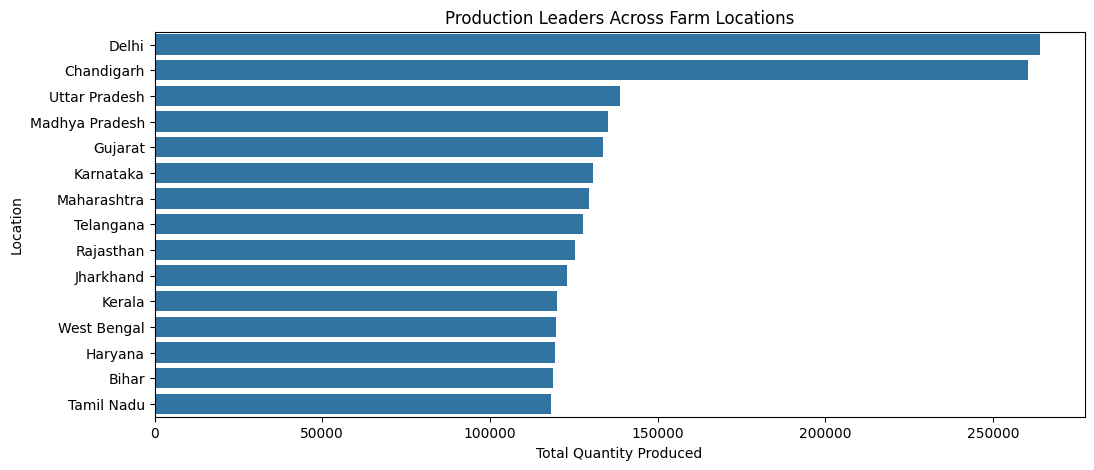

In [6]:
#Farm Performance Analysis
#Farm Production Overview by Location
farm_production = df.groupby("location")["quantity_(liters/kg)"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(y=farm_production.index, x=farm_production.values)
plt.title("Production Leaders Across Farm Locations")
plt.xlabel("Total Quantity Produced")
plt.ylabel("Location")
plt.show()

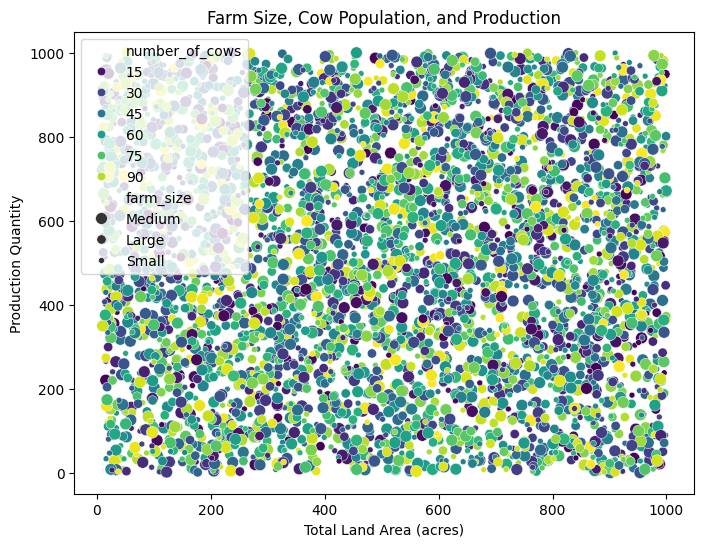

In [7]:
#Relationship Between Farm Size, Cow Population, and Production
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="total_land_area_(acres)",
    y="quantity_(liters/kg)",
    hue="number_of_cows",
    size="farm_size",
    palette="viridis"
)
plt.title("Farm Size, Cow Population, and Production")
plt.xlabel("Total Land Area (acres)")
plt.ylabel("Production Quantity")
plt.show()

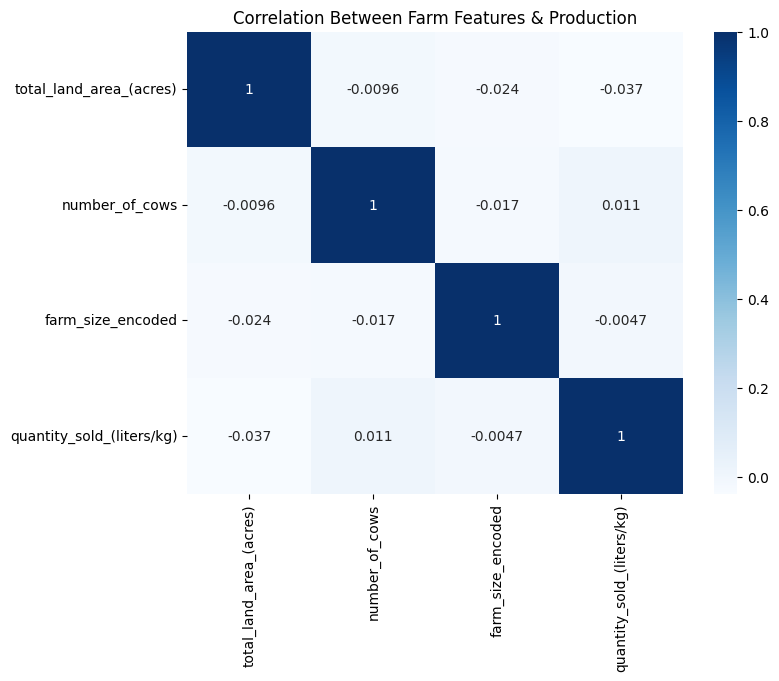

In [8]:
#Farm Feature Correlation Map
farm_cols = [
    "total_land_area_(acres)",
    "number_of_cows",
    "farm_size",
    "quantity_sold_(liters/kg)"
]

# Create a temporary dataframe for correlation to avoid modifying the original 'df'
temp_df = df[farm_cols].copy()

# Encode 'farm_size' column to numerical values
# LabelEncoder is already imported from sklearn.preprocessing
le = LabelEncoder()
temp_df["farm_size_encoded"] = le.fit_transform(temp_df["farm_size"])

# Drop the original 'farm_size' column and include the encoded one for correlation
correlation_cols = [
    "total_land_area_(acres)",
    "number_of_cows",
    "farm_size_encoded",
    "quantity_sold_(liters/kg)"
]

plt.figure(figsize=(8,6))
sns.heatmap(temp_df[correlation_cols].corr(), annot=True, cmap="Blues")
plt.title("Correlation Between Farm Features & Production")
plt.show()

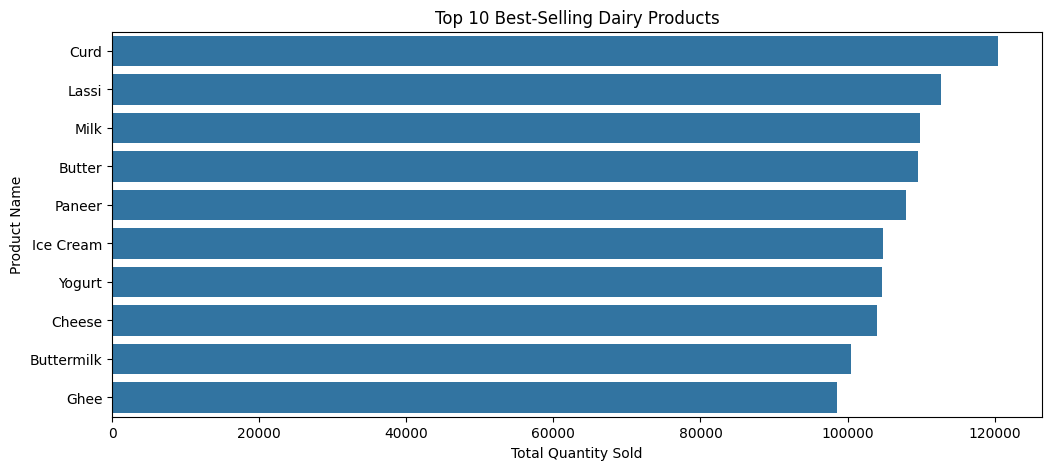

In [9]:
#Sales & Product Distribution Analysis
#Top 10 Best-Selling Dairy Products
top_products = df.groupby("product_name")["quantity_sold_(liters/kg)"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Best-Selling Dairy Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.show()

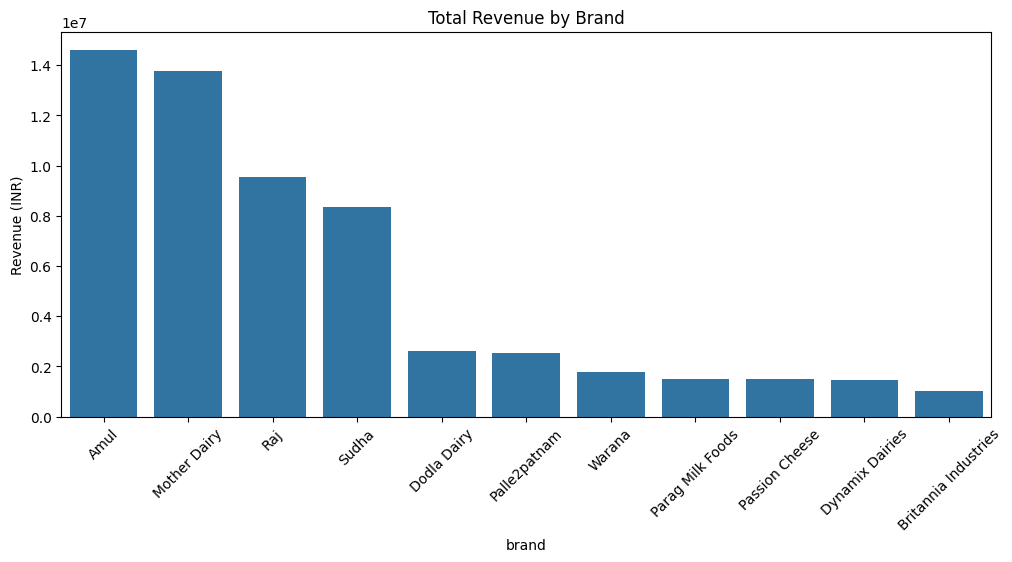

In [10]:
#Total Revenue Contribution by Brand
revenue_brand = df.groupby("brand")["approx._total_revenue(inr)"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x=revenue_brand.index, y=revenue_brand.values)
plt.xticks(rotation=45)
plt.title("Total Revenue by Brand")
plt.ylabel("Revenue (INR)")
plt.show()

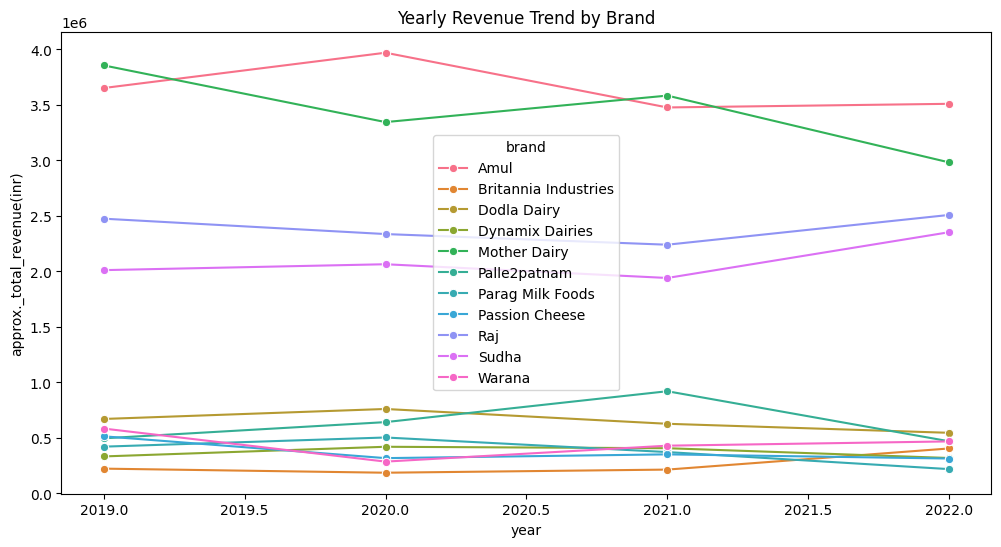

In [11]:
#Annual Brand Performance Trend
df["year"] = df["date"].dt.year
brand_trend = df.groupby(["year", "brand"])["approx._total_revenue(inr)"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=brand_trend, x="year", y="approx._total_revenue(inr)", hue="brand", marker="o")
plt.title("Yearly Revenue Trend by Brand")
plt.show()

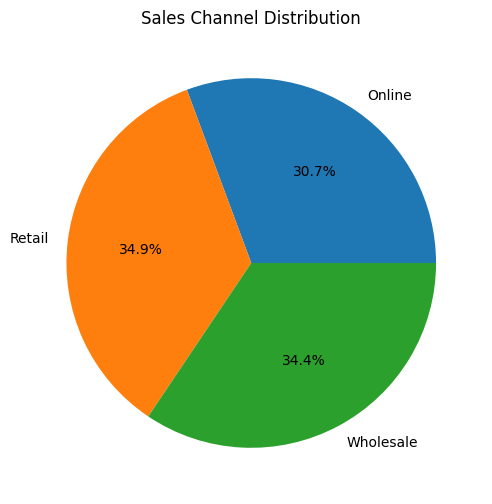

In [12]:
#Distribution of Sales Channels
channels = df.groupby("sales_channel")["quantity_sold_(liters/kg)"].sum()

plt.figure(figsize=(6,6))
plt.pie(channels, labels=channels.index, autopct="%1.1f%%")
plt.title("Sales Channel Distribution")
plt.show()

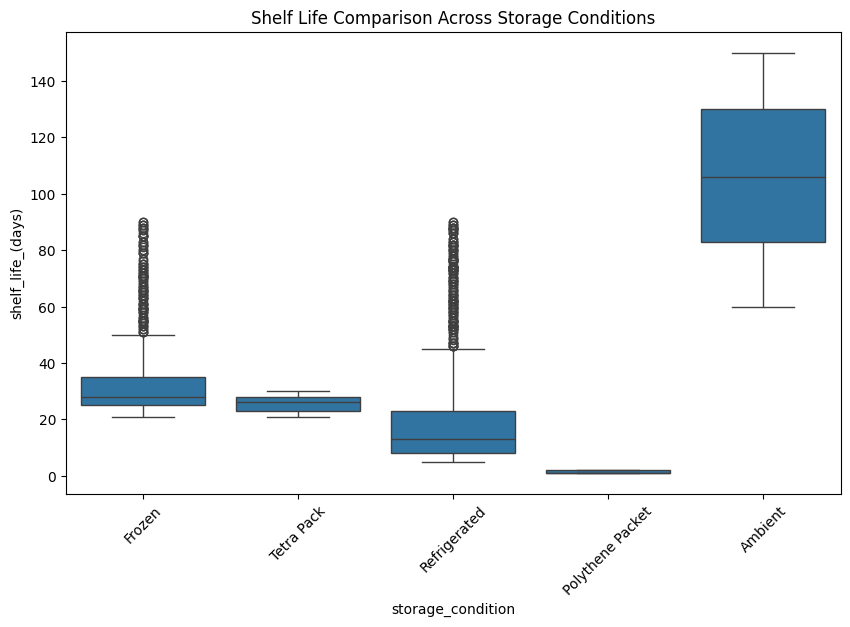

In [13]:
#Storage Condition & Shelf-Life Impact
#Shelf Life Distribution by Storage Condition
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="storage_condition", y="shelf_life_(days)")
plt.title("Shelf Life Comparison Across Storage Conditions")
plt.xticks(rotation=45)
plt.show()

In [14]:
#Products Approaching Expiration Before Sale
df["days_to_expire"] = (df["expiration_date"] - df["date"]).dt.days

expiring = df[df["days_to_expire"] <= 7]

expiring[["product_name", "brand", "days_to_expire"]].head()

,product_name,brand,days_to_expire
0,Ice Cream,Dodla Dairy,-27
1,Milk,Amul,-37
2,Yogurt,Dodla Dairy,-15
4,Buttermilk,Mother Dairy,-47
5,Curd,Raj,1


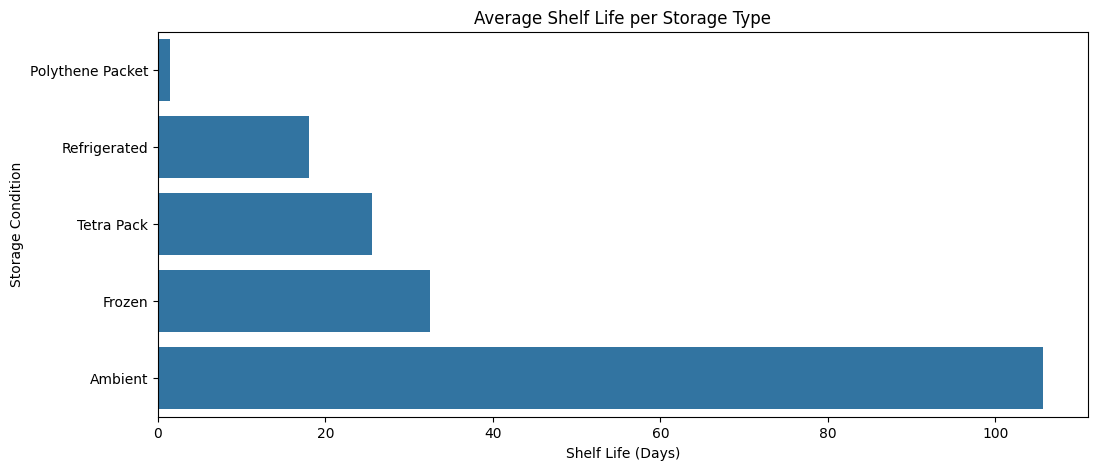

In [15]:
#Average Shelf Life per Storage Condition
avg_shelf = df.groupby("storage_condition")["shelf_life_(days)"].mean().sort_values()

plt.figure(figsize=(12,5))
sns.barplot(x=avg_shelf.values, y=avg_shelf.index)
plt.title("Average Shelf Life per Storage Type")
plt.xlabel("Shelf Life (Days)")
plt.ylabel("Storage Condition")
plt.show()

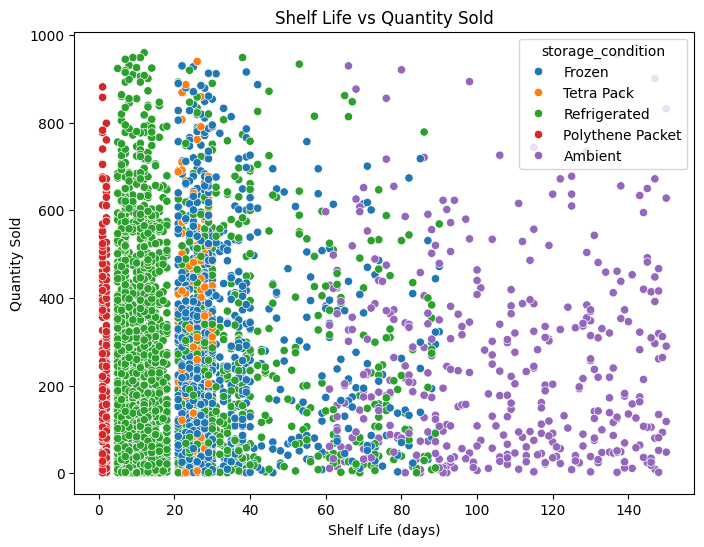

In [16]:
#Shelf Life vs Sales Performance
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="shelf_life_(days)",
    y="quantity_sold_(liters/kg)",
    hue="storage_condition"
)
plt.title("Shelf Life vs Quantity Sold")
plt.xlabel("Shelf Life (days)")
plt.ylabel("Quantity Sold")
plt.show()

In [17]:
#High-Risk Products Close to Expiring
df["days_to_expire"] = (df["expiration_date"] - df["date"]).dt.days

risk_expire = df[df["days_to_expire"] <= 3]

risk_expire[["product_name", "brand", "days_to_expire"]].head()

,product_name,brand,days_to_expire
0,Ice Cream,Dodla Dairy,-27
1,Milk,Amul,-37
2,Yogurt,Dodla Dairy,-15
4,Buttermilk,Mother Dairy,-47
5,Curd,Raj,1


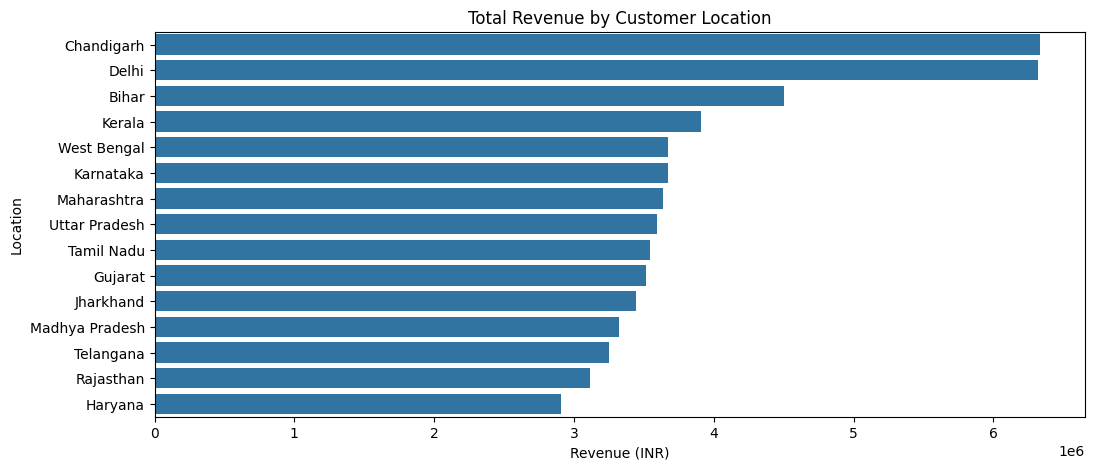

In [18]:
#Customer Behavior & Preference Analysis
#Revenue Contribution by Customer Location
revenue_location = df.groupby("customer_location")["approx._total_revenue(inr)"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x=revenue_location.values, y=revenue_location.index)
plt.title("Total Revenue by Customer Location")
plt.xlabel("Revenue (INR)")
plt.ylabel("Location")
plt.show()

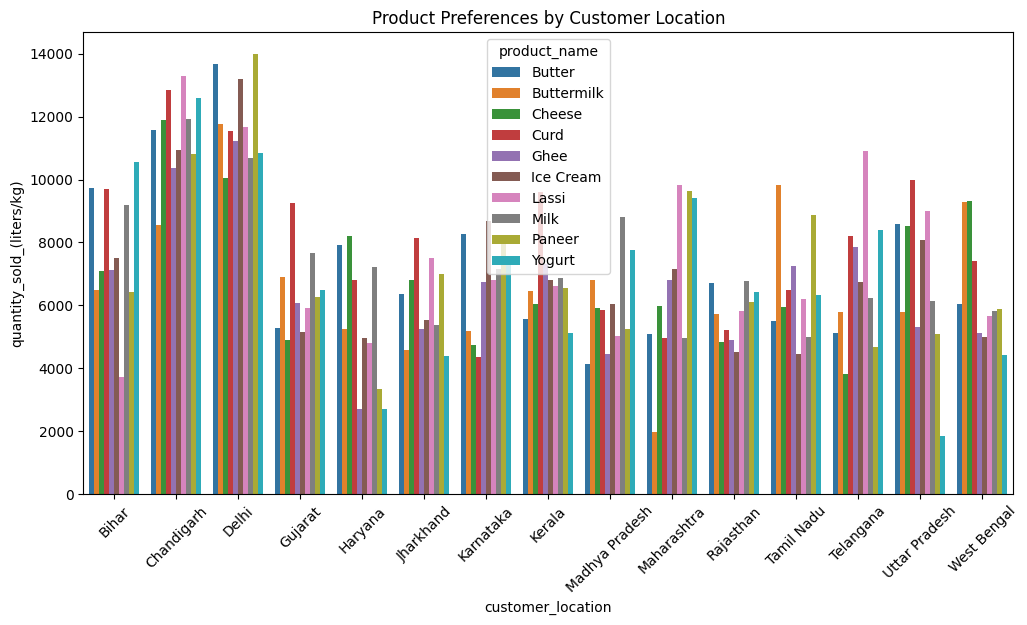

In [19]:
#Product Preferences by Region
top_products_location = df.groupby(["customer_location", "product_name"])["quantity_sold_(liters/kg)"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=top_products_location, x="customer_location", y="quantity_sold_(liters/kg)", hue="product_name")
plt.title("Product Preferences by Customer Location")
plt.xticks(rotation=45)
plt.show()

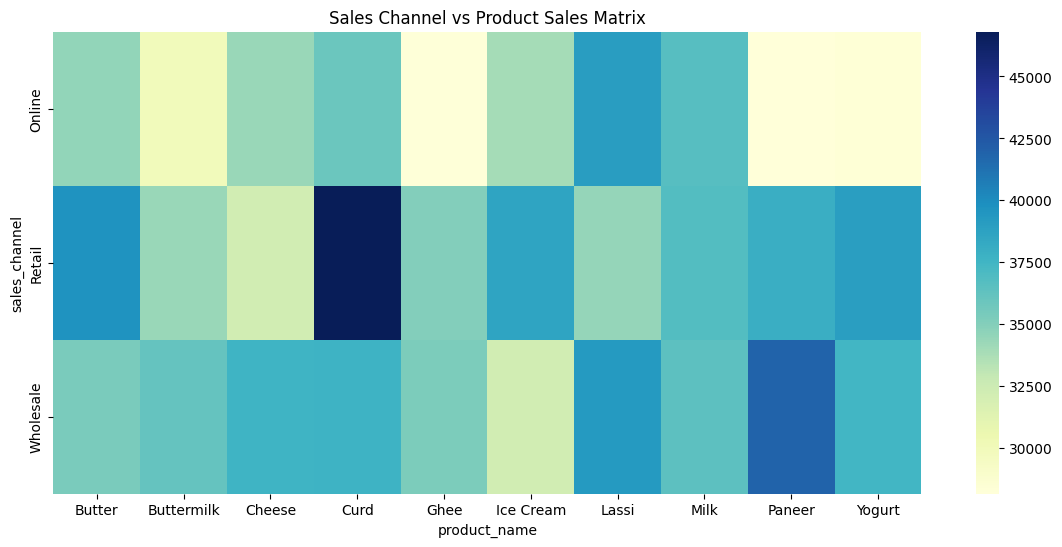

In [20]:
#Sales Channel × Product Category Matrix
channel_matrix = df.pivot_table(
    index="sales_channel",
    columns="product_name",
    values="quantity_sold_(liters/kg)",
    aggfunc="sum"
).fillna(0)

plt.figure(figsize=(14,6))
sns.heatmap(channel_matrix, cmap="YlGnBu")
plt.title("Sales Channel vs Product Sales Matrix")
plt.show()

In [21]:
#Inventory Management Analysis
#Inventory Health & Stock Level Distribution
df["need_reorder"] = df["quantity_in_stock_(liters/kg)"] < df["minimum_stock_threshold_(liters/kg)"]

reorder_list = df[df["need_reorder"] == True]

reorder_list[["product_name","brand","quantity_in_stock_(liters/kg)","minimum_stock_threshold_(liters/kg)","reorder_quantity_(liters/kg)"]].head()

,product_name,brand,quantity_in_stock_(liters/kg),minimum_stock_threshold_(liters/kg),reorder_quantity_(liters/kg)
4,Buttermilk,Mother Dairy,2,76.02,33.40
10,Yogurt,Dodla Dairy,30,81.34,118.57
12,Cheese,Passion Cheese,11,31.99,69.19
15,Milk,Mother Dairy,43,89.45,28.11
25,Paneer,Sudha,41,46.25,70.40


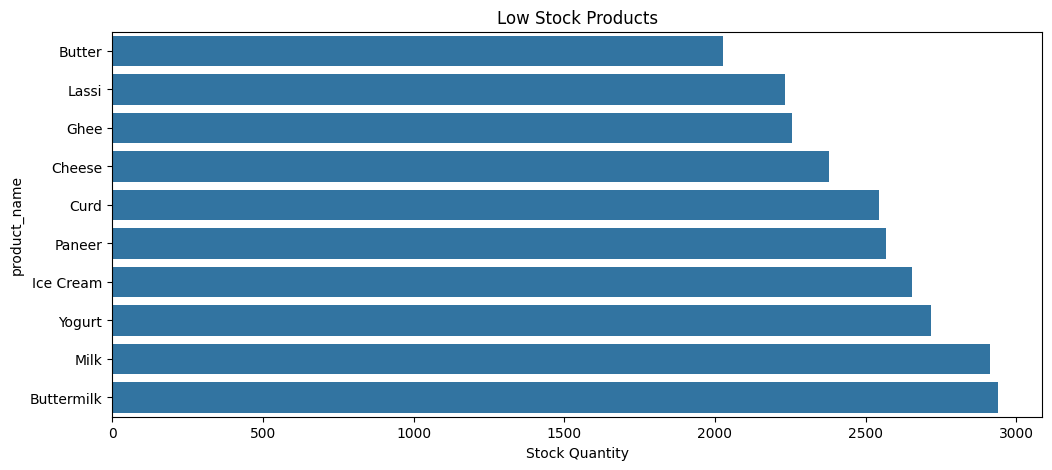

In [22]:
#Products with Critical Low Inventory
low_stock = reorder_list.groupby("product_name")["quantity_in_stock_(liters/kg)"].sum().sort_values()

plt.figure(figsize=(12,5))
sns.barplot(x=low_stock.values, y=low_stock.index)
plt.title("Low Stock Products")
plt.xlabel("Stock Quantity")
plt.show()

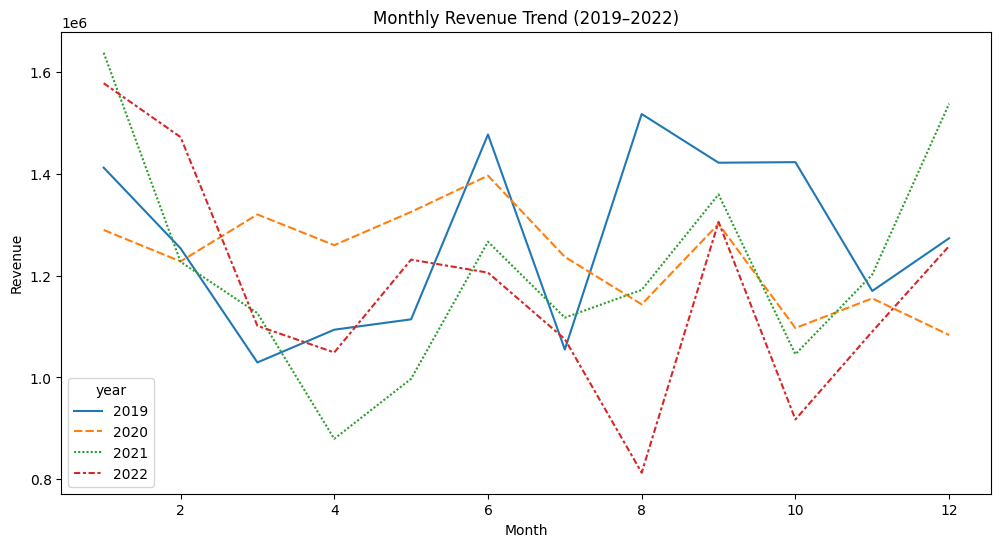

In [23]:
#Market Research & Trend Analysis
#Monthly Revenue Trend (2019–2022)
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

monthly_revenue = df.groupby(["year", "month"])["approx._total_revenue(inr)"].sum().unstack(0)

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_revenue)
plt.title("Monthly Revenue Trend (2019–2022)")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

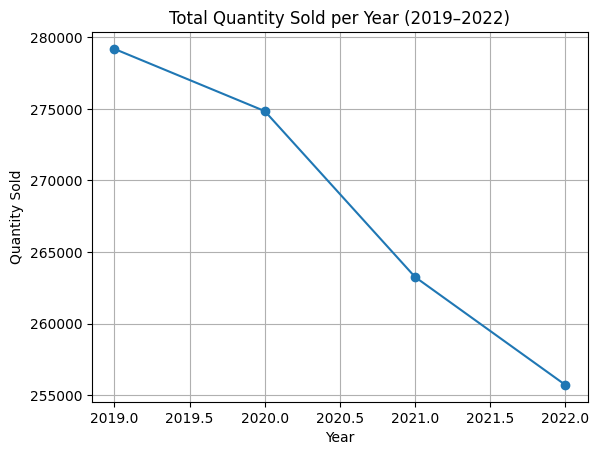

In [24]:
#Total Quantity Sold per Year
quantity_year = df.groupby("year")["quantity_sold_(liters/kg)"].sum()

plt.plot(quantity_year.index, quantity_year.values, marker="o")
plt.title("Total Quantity Sold per Year (2019–2022)")
plt.xlabel("Year")
plt.ylabel("Quantity Sold")
plt.grid(True)
plt.show()

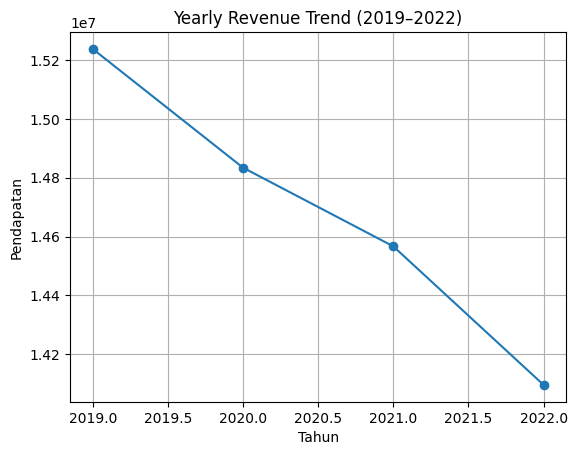

In [25]:
#Annual Revenue Trend Overview
df["year"] = df["date"].dt.year

revenue_year = df.groupby("year")["approx._total_revenue(inr)"].sum()

plt.plot(revenue_year.index, revenue_year.values, marker="o")
plt.title("Yearly Revenue Trend (2019–2022)")
plt.xlabel("Tahun")
plt.ylabel("Pendapatan")
plt.grid(True)
plt.show()

**🥛Dairy Business Performance Analysis**
<p align="justify">
This report provides a comprehensive analysis of the dairy industry dataset, covering farm performance, sales patterns, product shelf life, brand revenue behavior, customer buying preferences, and inventory health across the period 2019–2022. By examining production dynamics, distribution channels, product demand, and stock movement, this report highlights key operational strengths, identifies potential risks, and offers actionable business recommendations to improve profitability, reduce waste, and optimize supply chain efficiency.
</p>

**1. Farm Performance & Production Dynamics**
<p align="justify">
The analysis of total production per farm location reveals clear disparities in output across regions, suggesting that some farms benefit from superior land quality, management practices, or herd maturity. Notably, the Delhi and Chandigarh regions lead the overall production, indicating stronger farm efficiency and potentially more optimized resource utilization compared to other areas. When observing farm size, cow population, and production collectively, larger farms with higher cow counts generally achieve higher production, though the correlation chart indicates diminishing returns at extreme scales. This means that simply expanding land or herd size does not always guarantee proportional increases in output. The broader correlation matrix reinforces that production is strongly tied to cow population and moderately influenced by land area, highlighting the importance of optimizing herd health and density rather than solely expanding physical assets.
</p>

**Recommendation:**
<p align="justify">
Farms with lower productivity relative to size should perform efficiency audits (optimizing feeding systems, herd rotation schedules, and veterinary programs) to ensure that resources translate effectively into output.
</p>

**2. Product Performance & Revenue Distribution**
<p align="justify">
The ranking of the top 10 products shows a clear set of best sellers dominating the market, offering strong opportunities for focused marketing and strategic scaling. Curd, Lassi, and Milk emerge as the top-performing products, consistently achieving the highest demand and contributing significantly to total sales volume. Revenue distribution across brands highlights several strong performers, with brand revenue trends indicating which companies are sustaining growth over time and which may be experiencing stagnation or decline. Amul, Mother Dairy, and Raj stand out as the top revenue-generating brands, showing stable dominance and strong market penetration. Yearly revenue trends and total quantity sold per year do not follow a purely upward trajectory instead, they show periods of growth and decline. This fluctuation indicates that demand for dairy goods is influenced by seasonal patterns, shifting customer preferences, market dynamics, and possibly supply-side constraints.
</p>

**Recommendation:**
<p align="justify">
The presence of both increases and decreases highlights the need for brands to closely monitor market conditions, adjust production levels, and refine sales strategies to maintain stable performance across different years.
</p>

**3. Sales Channel & Customer Behavior Patterns**
<p align="justify">
Sales channel distribution shows that specific channels that is retail or wholesale dominate overall transactions. The sales channel vs product matrix further illustrates which product categories perform best in each channel, revealing opportunities for channel specific bundling, pricing strategies, or exclusive offers. Revenue by customer location indicates geographic clusters of high purchasing power, while customer location product preferences reveal distinct regional tastes, enabling hyper targeted product placement and localized promotional campaigns.
</p>

**Recommendation:**
<p align="justify">
Strengthening channel specific campaigns and tailoring product mixes to regional preferences can significantly increase conversion rates, reduce marketing waste, and improve overall profitability.
</p>

**4. Shelf Life, Storage Conditions & Expiration Risks**
<p align="justify">
Analyzing shelf life under various storage conditions highlights which environments most effectively extend product quality. Products approaching expiration before being sold, along with high risk items that frequently near expiry, indicate inefficiencies in inventory rotation or overproduction of slower moving SKUs. The products most commonly falling into this category include Ice Cream, Milk, Yogurt, Buttermilk, and Curd. The relationship between shelf life and quantity sold shows that items with shorter shelf lives tend to have less stable sales, requiring tighter stock management and more aggressive demand forecasting.
</p>
<p align="justify">
The average shelf life per storage condition chart adds clarity by showing which storage methods offer the most stability, with Ambient and Frozen conditions providing the longest shelf life. This insight helps determine optimal warehousing strategies and whether certain products should be redirected to faster channels before approaching expiration.
</p>

**Recommendation:**
<p align="justify">
Implementing FEFO (First-Expired, First-Out) workflows, adjusting production levels for slower moving goods, and improving storage optimization can significantly reduce waste and protect revenue margins.
</p>

**5. Inventory Health & Stock Optimization**
<p align="justify">
The inventory health and stock distribution table reveals clear imbalances in stock allocation, with certain items being overstocked while others frequently dip below ideal levels. Products identified as low stock need immediate replenishment planning to avoid lost sales opportunities, particularly butter, lassi, and ghee, which have the lowest stock levels. Meanwhile, overstocked items increase storage costs and risk expiration, especially for short shelf life categories.
</p>

**Recommendation:**
<p align="justify">
Adopting automated reorder systems and predictive inventory models will help synchronize stock levels with real time demand patterns, reducing both shortages and wastage.
</p>

**6. Time Based Sales Performance**
<p align="justify">
Monthly revenue trends show significant volatility rather than predictable seasonality, indicating unstable purchasing behavior or inconsistent supply dynamics. Meanwhile, both annual revenue and yearly quantity sold exhibit a declining pattern, pointing to weakening demand or competitive pressures that are reducing overall sales performance.
</p>

**Recommendation:**
<p align="justify">
Seasonal patterns should guide how production, marketing, and inventory are managed. Since the monthly revenue trends are highly volatile rather than predictable, businesses should focus on building flexible demand response strategies. During months with stronger performance, companies can intensify distribution and promotional exposure, while months with sharp declines require cost efficient tactics such as targeted discounts, bundled offers, or shifting inventory to channels with steadier demand. Because both yearly revenue and yearly quantity sold show a downward trajectory, brands must prioritize demand forecasting, avoid overproduction, and strengthen multi channel sales efforts to stabilize long term performance.
</p>